In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline 

1. Загружаем данные и делим на training sample и validation sample.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [ ]:
train_data = pd.read_csv("train.csv", index_col='Id')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (1).csv


In [ ]:
test_data = pd.read_csv('test.csv', index_col='Id')

In [ ]:
# Seperate features and target variable
X_train = train_data.drop(['SalePrice'], axis=1)
y = train_data.SalePrice

# Concatenate train and test data
X = pd.concat([X_train, test_data], axis=0)

In [ ]:
print("Размер данных для обучения: ", X_train.shape) 
print("Размер тестовых данных:", test_data.shape)

Размер данных для обучения:  (1460, 79)
Размер тестовых данных: (1459, 79)


In [ ]:
numCols = list(X_train.select_dtypes(exclude = 'object').columns) 
print(f"Есть {len(numCols)} числовых признаков: \n ", numCols)

Есть 36 числовых признаков: 
  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [ ]:
catCols = list(X_train.select_dtypes(include = 'object' ).columns) 
print(f"Есть {len(catCols)} числовых признака: \n ", catCols)

Есть 43 числовых признака: 
  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


2. Анализ признаков, поиск наиболее важных.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


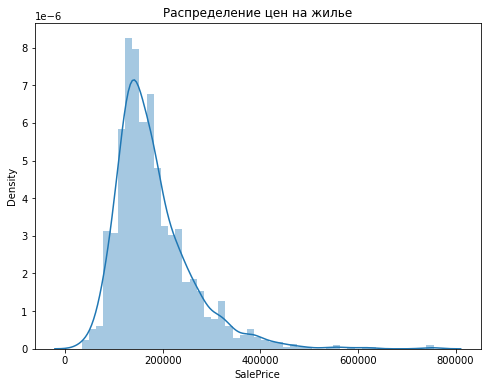

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(y)
title = plt.title("Распределение цен на жилье")

In [ ]:
print(f"""Асимметрия: {y.skew()} 
Эксцесс: {y.kurt()}""" )

Асимметрия: 1.8828757597682129 
Эксцесс: 6.536281860064529


Нас интересуют признаки наиболее сильно коррелирующие с ценой недвижимости.
Возьмем первые 11 в порядке убывания, соответственно SalePrice коррелирует сам с собой, его мы учитывать не будем.

In [ ]:
corr_mat = train_data.corr().SalePrice.sort_values(ascending=False)
corr_mat.head(11)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

Визуализируем коррелицию выбранных признаков, используя heatmap.

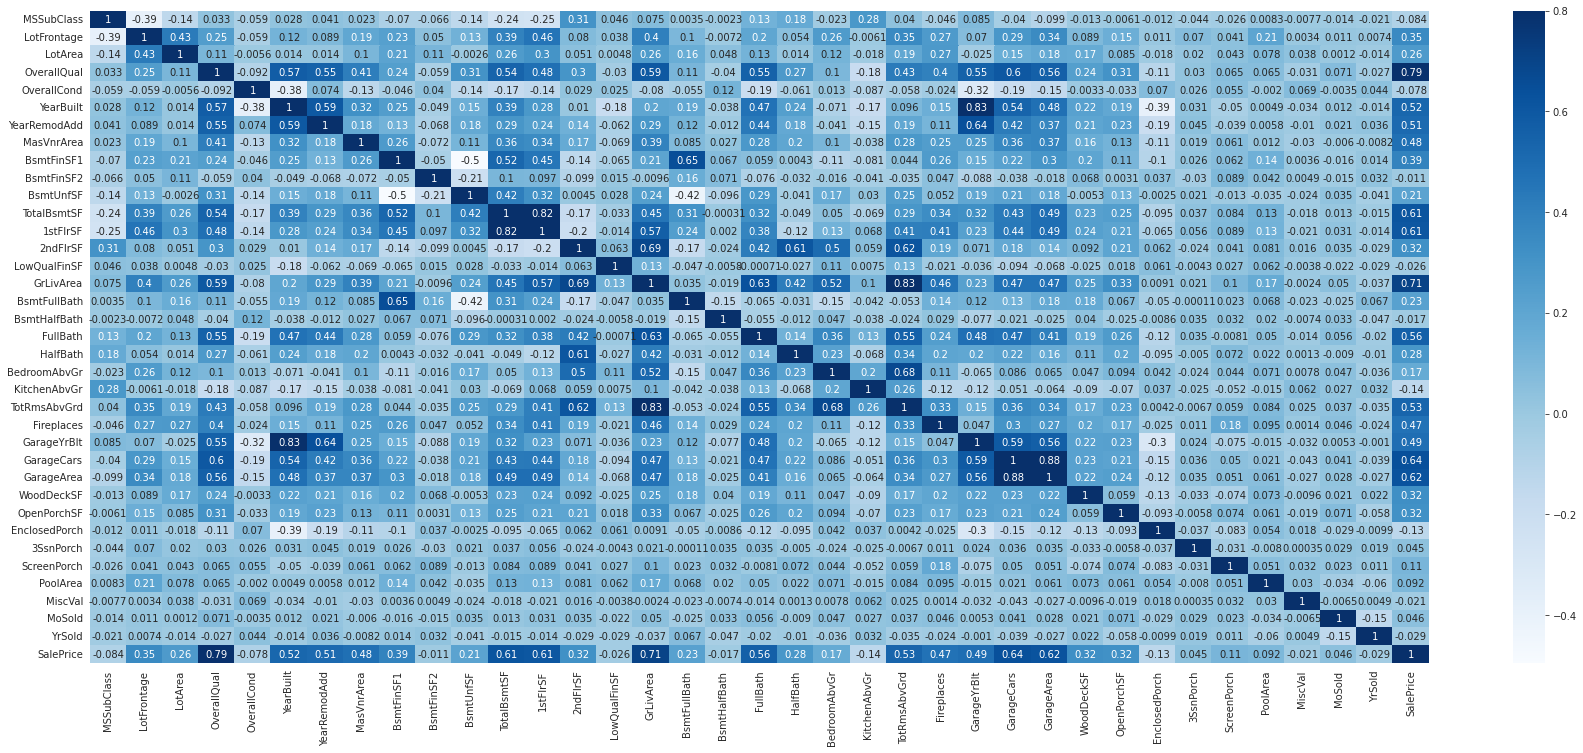

In [ ]:
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(30, 12))
sns.heatmap(corrmat, vmax=.8, annot=True, cmap="Blues");

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=10, step=1)
selector = rfe.fit(X_train.fillna(0).select_dtypes(exclude='object'), y)
selectedFeatures = list(
    X.select_dtypes(exclude='object').columns[selector.support_])
selectedFeatures

['OverallQual',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars']

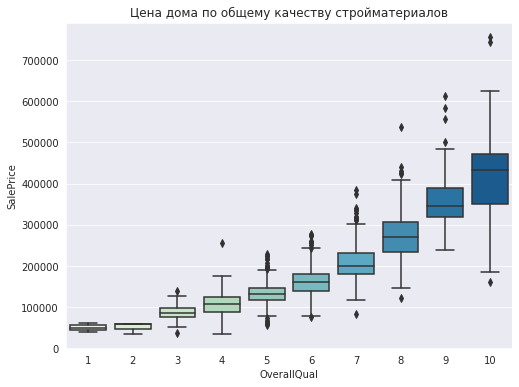

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_data, palette='GnBu')
title = plt.title('Цена дома по общему качеству стройматериалов')

Correlation:  0.7086244776126515


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x432 with 0 Axes>

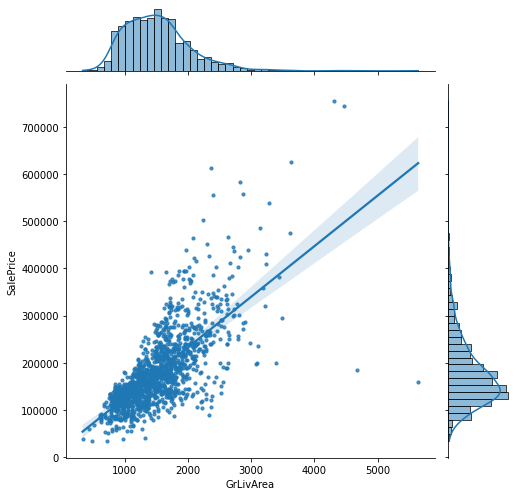

In [ ]:
def plotCorrelation(variables):
    """
    1. Вывести корреляцию двух переменных 
    2. Создать совместный график двух переменных 
    """
    # Вывести корреляцию
    print("Correlation: ", train_data[[variables[0],
                                       variables[1]]].corr().iloc[1, 0])

    # Создать совместный график 
    plt.figure(figsize=(6, 6))
    sns.jointplot(train_data[(variables[0])],
                  train_data[(variables[1])],
                  kind='reg',
                  height=7,
                  scatter_kws={'s': 10},
                  marginal_kws={'kde': True})


plotCorrelation(['GrLivArea', 'SalePrice'])

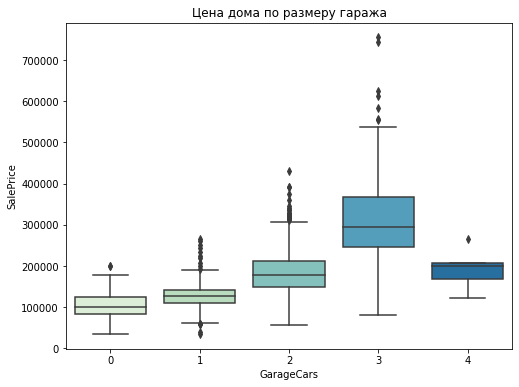

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='GarageCars', y='SalePrice', data=train_data, palette='GnBu')
title = plt.title('Цена дома по размеру гаража')

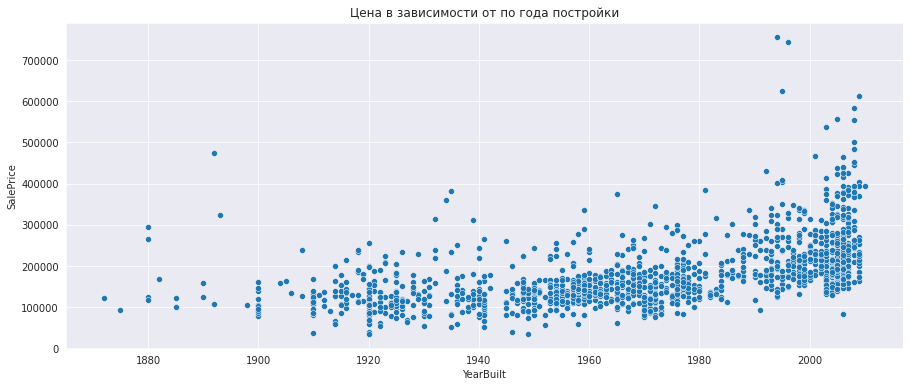

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train_data)
title = plt.title('Цена в зависимости от по года постройки')

Категориальные переменные 

In [ ]:
sigCatCols = [
    'Street', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
    'Condition1', 'Condition2', 'RoofMatl', 'ExterQual', 'BsmtQual',
    'BsmtExposure', 'KitchenQual', 'Functional', 'GarageQual', 'PoolQC'
]

In [ ]:
def visualizeCatFeature(feature):
    """
    Визуализируем взаимосвязь между `SalePrice` и категориальной характеристикой, используя диаграммы 
    """
    # Убывающий порядок уровней, отсортированных по медиане SalePrice 
    featOrder = train_data.groupby(
        [feature]).median().SalePrice.sort_values(ascending=False).index

    # График
    sns.boxplot(x=feature,
                y='SalePrice',
                data=train_data,
                order=featOrder,
                palette='Set3')

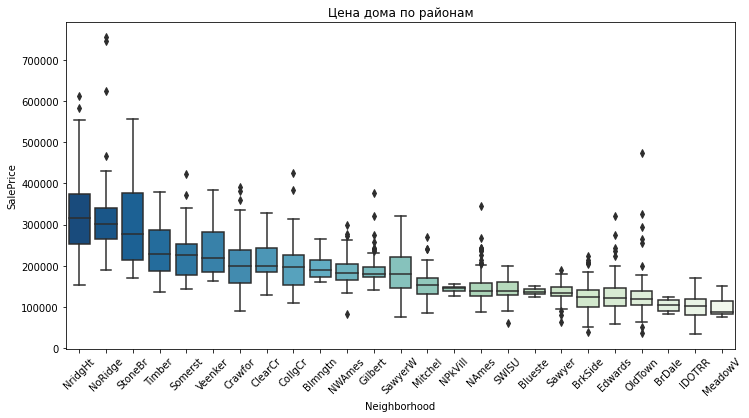

In [ ]:
plt.figure(figsize=(12, 6))
visualizeCatFeature('Neighborhood')
title = plt.title('Цена дома по районам')
tick = plt.xticks(rotation=45)

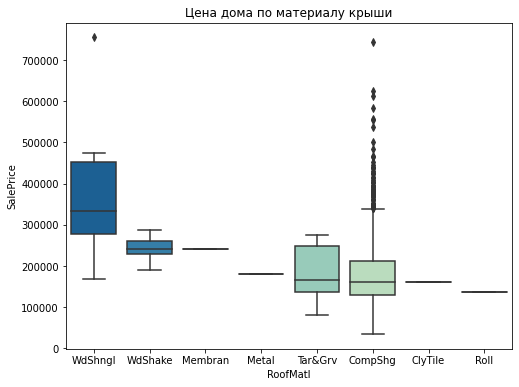

In [ ]:
plt.figure(figsize=(8, 6))
visualizeCatFeature('RoofMatl')
title = plt.title('Цена дома по материалу крыши')

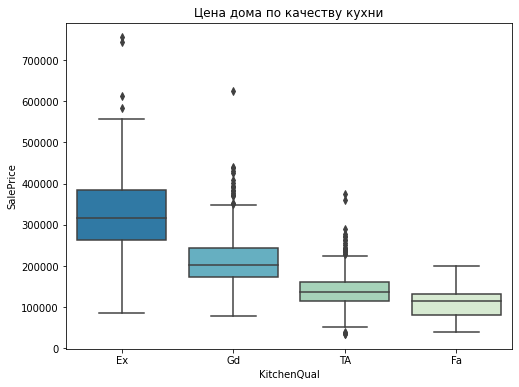

In [ ]:
plt.figure(figsize=(8, 6))
visualizeCatFeature('KitchenQual')
title = plt.title('Цена дома по качеству кухни')

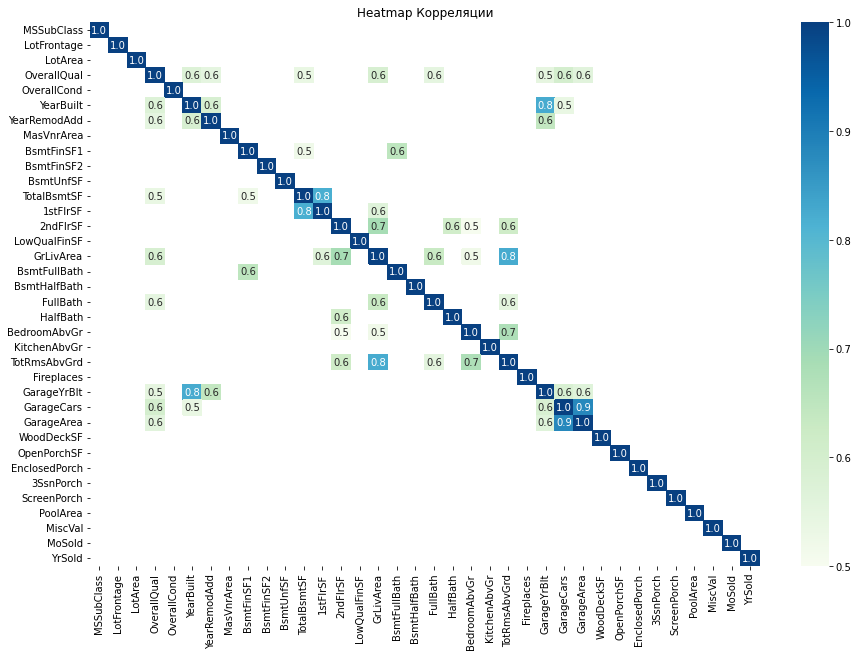

In [ ]:
# Create correlation matrix from train data excluding `SalePrice`
corr_mat = train_data.iloc[:, :-1].corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Heatmap Корреляции')

In [ ]:
missing_data_count = X.isnull().sum()
missing_data_percent = X.isnull().sum() / len(X) * 100

missing_data = pd.DataFrame({
    'Count': missing_data_count,
    'Percent': missing_data_percent
})
missing_data = missing_data[missing_data.Count > 0]
missing_data.sort_values(by='Count', ascending=False, inplace=True)

print(f"Есть объекты {missing_data.shape[0]} с отсутствующими данными.\n")
print("10 основных объектов с отсутствующими значениями:")
missing_data.head(10)

Есть объекты 34 с отсутствующими данными.

10 основных объектов с отсутствующими значениями:


,Count,Percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageFinish,159,5.447071
GarageQual,159,5.447071
GarageCond,159,5.447071
GarageYrBlt,159,5.447071


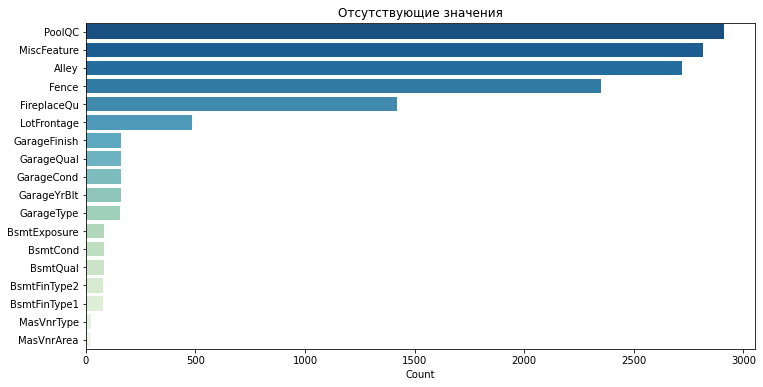

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(y=missing_data.head(18).index,
            x=missing_data.head(18).Count,
            palette='GnBu_r')
title = plt.title("Отсутствующие значения")

Предварительная обработка данных и проектирование признаков

In [ ]:
missing_data_count = X.isnull().sum()
missing_data_percent = X.isnull().sum() / len(X) * 100
missing_data = pd.DataFrame({
    'Count': missing_data_count,
    'Percent': missing_data_percent
})
missing_data = missing_data[missing_data.Count > 0]
missing_data.sort_values(by='Count', ascending=False, inplace=True)

In [ ]:
missing_data.head(10)

,Count,Percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageFinish,159,5.447071
GarageQual,159,5.447071
GarageCond,159,5.447071
GarageYrBlt,159,5.447071


In [ ]:
from sklearn.impute import SimpleImputer
# Group 1:
group_1 = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'
]
X[group_1] = X[group_1].fillna("None")

# Group 2:
group_2 = [
    'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'
]

X[group_2] = X[group_2].fillna(0)

# Group 3:
group_3a = [
    'Functional', 'MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st',
    'Exterior2nd', 'SaleType', 'Utilities'
]

imputer = SimpleImputer(strategy='most_frequent')
X[group_3a] = pd.DataFrame(imputer.fit_transform(X[group_3a]), index=X.index)

X.LotFrontage = X.LotFrontage.fillna(X.LotFrontage.mean())
X.GarageYrBlt = X.GarageYrBlt.fillna(X.YearBuilt)

In [ ]:
sum(X.isnull().sum())

0

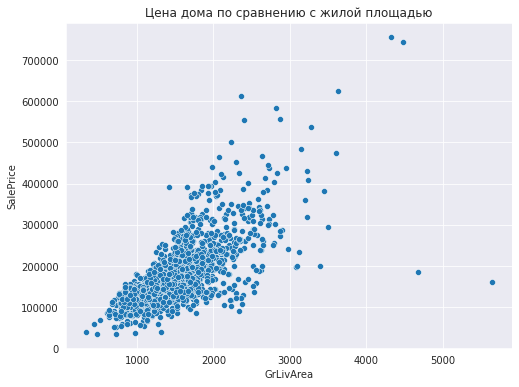

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data)
title = plt.title('Цена дома по сравнению с жилой площадью')

In [ ]:
outlier_index = train_data[(train_data.GrLivArea > 4000)
                           & (train_data.SalePrice < 200000)].index
X.drop(outlier_index, axis=0, inplace=True)
y.drop(outlier_index, axis=0, inplace=True)

In [ ]:
X['totalSqFeet'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
X['totalBathroom'] = X.FullBath + X.BsmtFullBath + 0.5 * (X.HalfBath + X.BsmtHalfBath)
X['houseAge'] = X.YrSold - X.YearBuilt
X['reModeled'] = np.where(X.YearRemodAdd == X.YearBuilt, 0, 1)
X['isNew'] = np.where(X.YrSold == X.YearBuilt, 1, 0)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Порядковые категориальные столбцы 
label_encoding_cols = [
    "Alley", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
    "BsmtQual", "ExterCond", "ExterQual", "FireplaceQu", "Functional",
    "GarageCond", "GarageQual", "HeatingQC", "KitchenQual", "LandSlope",
    "LotShape", "PavedDrive", "PoolQC", "Street", "Utilities"
]

# Применить кодировщик меток
label_encoder = LabelEncoder()

for col in label_encoding_cols:
    X[col] = label_encoder.fit_transform(X[col])

In [ ]:
to_factor_cols = ['YrSold', 'MoSold', 'MSSubClass']

for col in to_factor_cols:
    X[col] = X[col].apply(str)

In [ ]:
from scipy import stats
from scipy.stats import norm

In [ ]:
def normality_plot(X):
    """
    1. Нарисуем график распределения с подгонкой кривой нормального распределения 
    2. Нарисуем график
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.distplot(X, fit=norm, ax=axes[0])
    axes[0].set_title('Distribution Plot')

    axes[1] = stats.probplot((X), plot=plt)
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


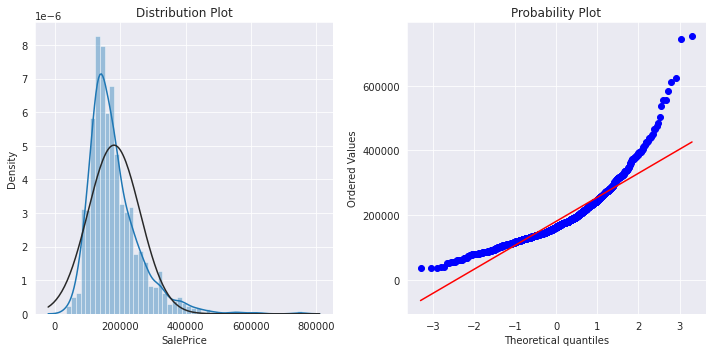

In [ ]:
normality_plot(y)

In [ ]:
y = np.log(1 + y)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


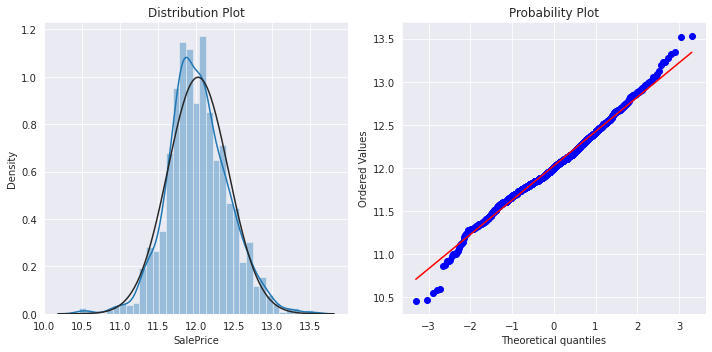

In [ ]:
normality_plot(y)

In [ ]:
skewness = train_data.skew().sort_values(ascending=False)
skewness[abs(skewness) > 0.75]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


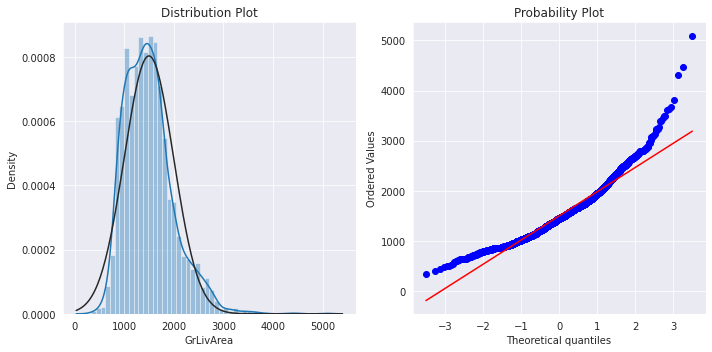

In [ ]:
normality_plot(X.GrLivArea)

In [ ]:
# Список асимметричных столбцов 
skewed_cols = list(skewness[abs(skewness) > 0.5].index)

# Удалить 'MSSubClass' и 'SalePrice' 
skewed_cols = [
    col for col in skewed_cols if col not in ['MSSubClass', 'SalePrice']
]

# Лог-преобразование асимметричных столбцов 
for col in skewed_cols:
    X[col] = np.log(1 + X[col])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


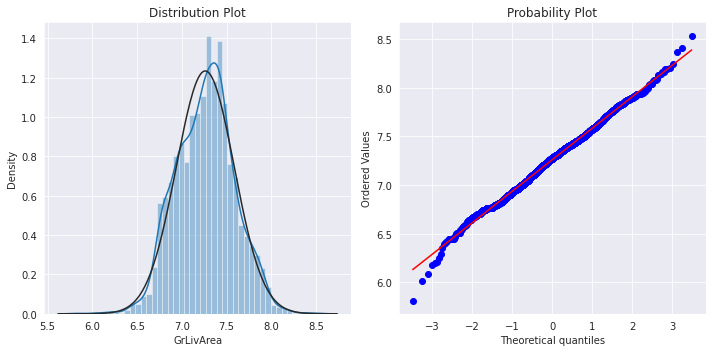

In [ ]:
normality_plot(X.GrLivArea)

In [ ]:
from sklearn.preprocessing import RobustScaler
numerical_cols = list(X.select_dtypes(exclude=['object']).columns)
scaler = RobustScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [ ]:
X = pd.get_dummies(X, drop_first=True)
print("X.shape:", X.shape)

X.shape: (2917, 237)


In [ ]:
ntest = len(test_data)
X_train = X.iloc[:-ntest, :]
X_test = X.iloc[-ntest:, :]
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)

X_train.shape: (1458, 237)
X_test.shape: (1459, 237)


При оценке модели общепринятой практикой является разделение всех обучающих данных на 2 набора данных (обучение и тестирование). Однако модель может очень хорошо работать на наборе тестовых данных, но плохо работать на других наборах невидимых данных

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

n_folds = 5


def getRMSLE(model):
    """
    Возвращает среднее значение RMSLE по всем сверткам обучающих данных.
    """
    # Установим KFold для перемешивания данных перед разделением
    kf = KFold(n_folds, shuffle=True, random_state=42)

    # Получим RMSLE оценку
    rmse = np.sqrt(-cross_val_score(
        model, X_train, y, scoring="neg_mean_squared_error", cv=kf))

    return rmse.mean()

1.  

In [ ]:
from sklearn.linear_model import Ridge, Lasso

Гребневая регрессия или ридж-регрессия (англ. ridge regression) — один из методов понижения размерности. Применяется для борьбы с избыточностью данных, когда независимые переменные коррелируют друг с другом, вследствие чего проявляется неустойчивость оценок коэффициентов многомерной линейной регрессии.


Best lambda: 22.9
RMSLE: 0.11409306668450885


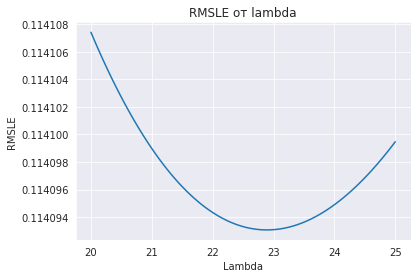

In [ ]:
lambda_list = list(np.linspace(20, 25, 101))

rmsle_ridge = [getRMSLE(Ridge(alpha=lambda_)) for lambda_ in lambda_list]
rmsle_ridge = pd.Series(rmsle_ridge, index=lambda_list)

rmsle_ridge.plot(title="RMSLE от lambda")
plt.xlabel("Lambda")
plt.ylabel("RMSLE")

print("Best lambda:", rmsle_ridge.idxmin())
print("RMSLE:", rmsle_ridge.min())

In [ ]:
ridge = Ridge(alpha=22.9)



Далее воспользуемся Лассо-регрессией. Основное различие лассо- и ридж-регрессии заключается в том, что первая может приводить к обращению некоторых независимых переменных в ноль, тогда как вторая уменьшает их до значений, близких к нулю. Рассмотрим для простоты двумерное пространство независимых переменных.

Best lambda: 0.00065
RMSLE: 0.1133570157806129


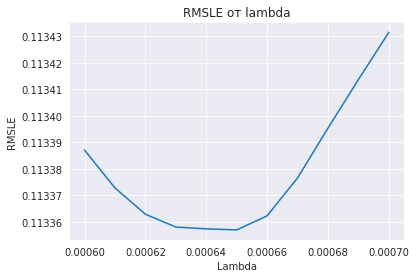

In [ ]:
lambda_list = list(np.linspace(0.0006, 0.0007, 11))
rmsle_lasso = [
    getRMSLE(Lasso(alpha=lambda_, max_iter=100000)) for lambda_ in lambda_list
]
rmsle_lasso = pd.Series(rmsle_lasso, index=lambda_list)

rmsle_lasso.plot(title="RMSLE от lambda")
plt.xlabel("Lambda")
plt.ylabel("RMSLE")

print("Best lambda:", rmsle_lasso.idxmin())
print("RMSLE:", rmsle_lasso.min())

In [ ]:
lasso = Lasso(alpha=0.00065, max_iter=100000)

XGBoost – более регуляризованная форма градиентного бустинга. Основным преимуществом данной библиотеки является производительность и эффективная оптимизация вычислений (лучший результат с меньшей затратой ресурсов).

Следуя этому полному руководству по настройке параметров для XGBoost, я соответственно настраиваю и нахожу лучший параметр для n_estimators max_depth min_child_weight gamma subsample colsample_bytree reg_alpha reg_lambda learning_rate.

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(learning_rate=0.05,
                   n_estimators=2100,
                   max_depth=2,
                   min_child_weight=2,
                   gamma=0,
                   subsample=0.65,
                   colsample_bytree=0.46,
                   nthread=-1,
                   scale_pos_weight=1,
                   reg_alpha=0.464,
                   reg_lambda=0.8571,
                   silent=1,
                   random_state=7,
                   n_jobs=2)
getRMSLE(xgb)

0.11799856700856862

LightGBM — это мощная платформа повышения градиента, основанная на алгоритме дерева решений. Как и XGBoost, LightGBM имеет высокую производительность на больших наборах данных, но гораздо более высокую скорость обучения, чем у XGBoost.
Также был выбран из-за повышенной эффективности обучения, низкого использования памяти,лучшей точности и поддержка параллельного обучения.
 Следуя этому руководству , я настроил параметры num_leaves min_data_in_leaf max_depth bagging_fraction feature_fraction max_bin. Как вы можете видеть из приведенного ниже RMSLE, для этого набора данных LightGBM имеет лучшую производительность, чем XGBoost.

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgb = LGBMRegressor(objective='regression',
                    learning_rate=0.05,
                    n_estimators=730,
                    num_leaves=8,
                    min_data_in_leaf=4,
                    max_depth=3,
                    max_bin=55,
                    bagging_fraction=0.78,
                    bagging_freq=5,
                    feature_fraction=0.24,
                    feature_fraction_seed=9,
                    bagging_seed=9,
                    min_sum_hessian_in_leaf=11)
getRMSLE(lgb)

0.11502519784230872

Модель усреднения, использующая лассо и ридж регрессии, а также XGBoost, LightGBM.

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone


class AveragingModel(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        # Create clone models
        self.models_ = [clone(x) for x in self.models]

        # Train cloned models
        for model in self.models_:
            model.fit(X, y)

        return self

    def predict(self, X):
        # Get predictions from trained clone models
        predictions = np.column_stack(
            [model.predict(X) for model in self.models_])

        # Return average predictions
        return np.mean(predictions, axis=1)

In [ ]:
avg_model = AveragingModel(models=(ridge, lasso, xgb, lgb))
getRMSLE(avg_model)

0.11106525046063447

In [ ]:
Испытаем нашу модель и получим предсказания.

In [ ]:
my_model = avg_model
my_model.fit(X_train, y)
predictions = my_model.predict(X_test)
final_predictions = np.exp(predictions) - 1
output = pd.DataFrame({'Id': test_data.index, 'SalePrice': final_predictions})
output.to_csv('submission.csv', index=False)
output

,Id,SalePrice
0,1461,119792.891338
1,1462,158025.339729
2,1463,183415.514132
3,1464,197085.835207
4,1465,193907.125242
...,...,...
1454,2915,85379.375564
1455,2916,82403.393347
1456,2917,165159.723317
1457,2918,118725.104615
